In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import model_from_json
from sklearn.preprocessing import LabelBinarizer
import os
from imutils import paths
from tqdm import tqdm
from matplotlib.pyplot import imshow
import splitfolders

In [2]:
input_folder="../dataset/originalDataset"
output_folder="../dataset/projectDataset"

In [3]:
if(os.path.exists("../dataset/projectDataset/train")):
    print("Dataset if already splitted")
else:
    splitfolders.ratio(input_folder,output=output_folder,seed=42,ratio=(0.7,0.2,0.1),group_prefix=None);

Dataset if already splitted


In [4]:
train_path = "../dataset/projectDataset/train"
#dataset path

In [5]:
# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing, etc.
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen.fill_mode='constant'
train_datagen.horizontal_flip=True
train_datagen.zoom_range=[0.8, 1.2]
train_datagen.rotation_range=20
train_datagen.shear_range=10
train_datagen.brightness_range = [0.75, 1.5]


#making image as 227X227 for input of alexnet
train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical')

Found 3019 images belonging to 5 classes.


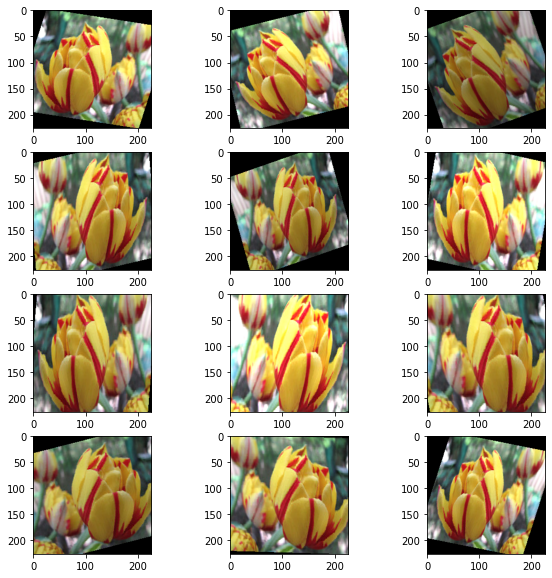

In [6]:
fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train[1][0][0])
axs[0][1].imshow(train[1][0][0])
axs[0][2].imshow(train[1][0][0])
axs[1][0].imshow(train[1][0][0])
axs[1][1].imshow(train[1][0][0])
axs[1][2].imshow(train[1][0][0])
axs[2][0].imshow(train[1][0][0])
axs[2][1].imshow(train[1][0][0])
axs[2][2].imshow(train[1][0][0])
axs[3][0].imshow(train[1][0][0])
axs[3][1].imshow(train[1][0][0])
axs[3][2].imshow(train[1][0][0])

In [7]:
from keras.models import Sequential

model = Sequential()

# first convolutional layer with filters=96, kernal size=11X11, starides=4 named as "conv0"
# relu activation function will make negative values as zero
model.add(Conv2D(96, (11, 11), strides=(4,4), padding='same', activation='relu', input_shape=(227, 227, 3)))
# max pooling with filter size=3X3, and starides=2 named as "max0"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# second convolutional layer with filters=256, kernal size=5X5, named as "conv1"
    # we are using padding='same' which means we do not want to drop any right most columns
    # so we will add 0 to fit our kernal to the input
    # relu activation function will make negative values as zero
    # max pooling with filter size=3X3, and starides=2 named as "max1"
model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))


model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))


# flatten the input feature map. here it flattens the last feature map before it
model.add(Flatten())


# add FC layers. Using less no. of neurons here
model.add(Dense(384, activation='relu'))
model.add(Dense(384, activation='relu'))

# add FC layer with 10 units for we have 10 classes
# use softmax activation for classification
model.add(Dense(5, activation='softmax'))

In [8]:
from keras.models import Model
### Training 
from keras.layers import Activation, MaxPooling2D
from keras.models import Sequential
# Define A Training Model
model = Sequential()
# YOUR_CODE HERE
model.add(Conv2D(32, (3, 3), input_shape=(227, 227, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 225, 225, 32)      896       
                                                                 
 activation (Activation)     (None, 225, 225, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

In [9]:
# printing summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 225, 225, 32)      896       
                                                                 
 activation (Activation)     (None, 225, 225, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 110, 110, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

In [10]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

In [11]:
# compiling model
model.compile(optimizer = sgd , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [12]:
# training our model
# we are using .fit method instead of .fit_generator because we have tensorflow 2.4.0
epochsCount = 5
hist = model.fit(train,epochs=epochsCount)

Epoch 1/5
95/95 [==============================] - 204s 2s/step - loss: 1.4807 - accuracy: 0.3551
Epoch 2/5
95/95 [==============================] - 162s 2s/step - loss: 1.2942 - accuracy: 0.4425
Epoch 3/5
95/95 [==============================] - 157s 2s/step - loss: 1.1967 - accuracy: 0.4859
Epoch 4/5
95/95 [==============================] - 162s 2s/step - loss: 1.1610 - accuracy: 0.5098
Epoch 5/5
95/95 [==============================] - 152s 2s/step - loss: 1.1178 - accuracy: 0.5389


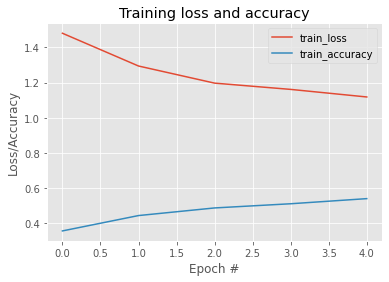

In [13]:
import matplotlib.pyplot as plt
N = np.arange(0, epochsCount)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, hist.history['loss'], label='train_loss')
plt.plot(N, hist.history['accuracy'], label='train_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [31]:
# loading validation data
path_test = "../dataset/projectDataset/val"
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 860 images belonging to 5 classes.


In [32]:
test_steps_per_epoch = np.math.ceil(test.samples / test.batch_size)

predictions = model.predict(test, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [33]:
true_classes = test.classes
class_labels = list(test.class_indices.keys())

In [34]:
# checking cross validation accuracy/test accuracy
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

27/27 [==============================] - 10s 373ms/step - loss: 1.1241 - accuracy: 0.5186
Loss = 1.1240661144256592
Test Accuracy = 0.5186046361923218


In [35]:
import sklearn.metrics as metrics

In [36]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       daisy       0.20      0.09      0.12       152
   dandelion       0.27      0.50      0.35       210
        rose       0.24      0.20      0.22       156
   sunflower       0.19      0.15      0.17       146
       tulip       0.22      0.17      0.19       196

    accuracy                           0.24       860
   macro avg       0.22      0.22      0.21       860
weighted avg       0.23      0.24      0.22       860



In [37]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

<AxesSubplot:>

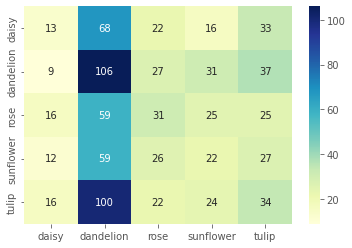

In [38]:
import seaborn as sns
class_names=["daisy","dandelion","rose","sunflower","tulip"]
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='d', cmap="YlGnBu")

In [39]:
# loading prediction data

path_pred = "../dataset/projectDataset/test"
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_pred, target_size=(227,227),class_mode='categorical')

Found 438 images belonging to 5 classes.


In [23]:
predictions = model.predict(predict)

In [40]:
def get_category(predicted_output):
    path1 ="../dataset/projectDataset/train"
    return os.listdir(path1)[np.argmax(predicted_output)]

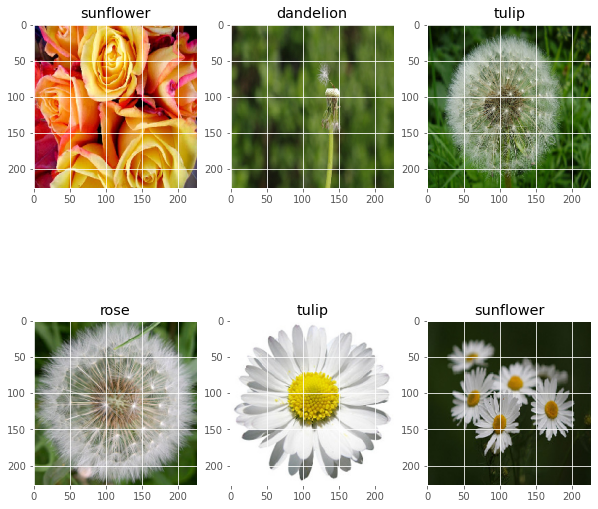

In [41]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))
axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))
axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))
axs[1][0].imshow(predict[4][0][0])
axs[1][0].set_title(get_category(predictions[4]))
axs[1][1].imshow(predict[5][0][0])
axs[1][1].set_title(get_category(predictions[5]))
axs[1][2].imshow(predict[6][0][0])
axs[1][2].set_title(get_category(predictions[6]))


plt.show()